In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
df=pd.read_csv('datasets/advertising.csv')

In [3]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


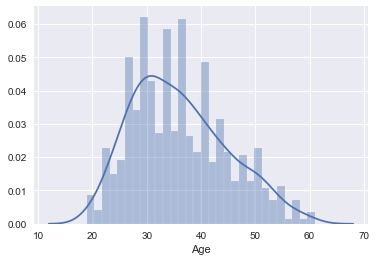

In [6]:
sns.distplot(df['Age'],bins=30,hist_kws={'edgecolor':'w'})

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


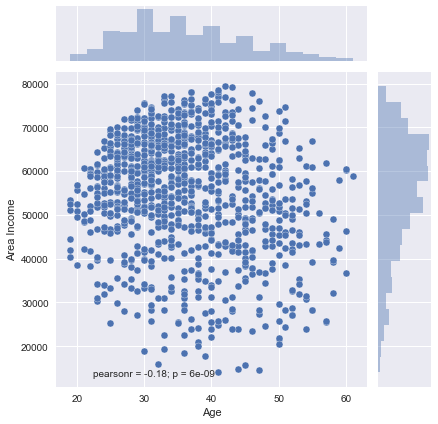

In [7]:
sns.jointplot('Age','Area Income',df,joint_kws={'edgecolor':'w'})

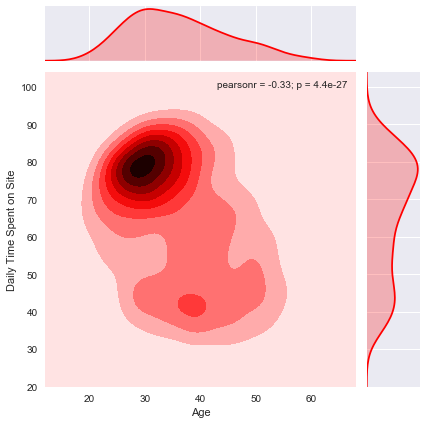

In [8]:
sns.jointplot('Age','Daily Time Spent on Site',df,kind='kde',color='R')

C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


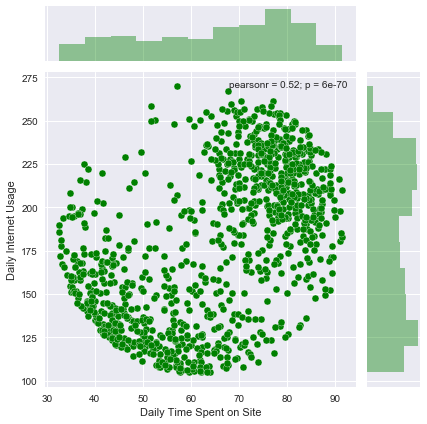

In [9]:
sns.jointplot('Daily Time Spent on Site','Daily Internet Usage',df,color='G',joint_kws={'edgecolor':'w'})

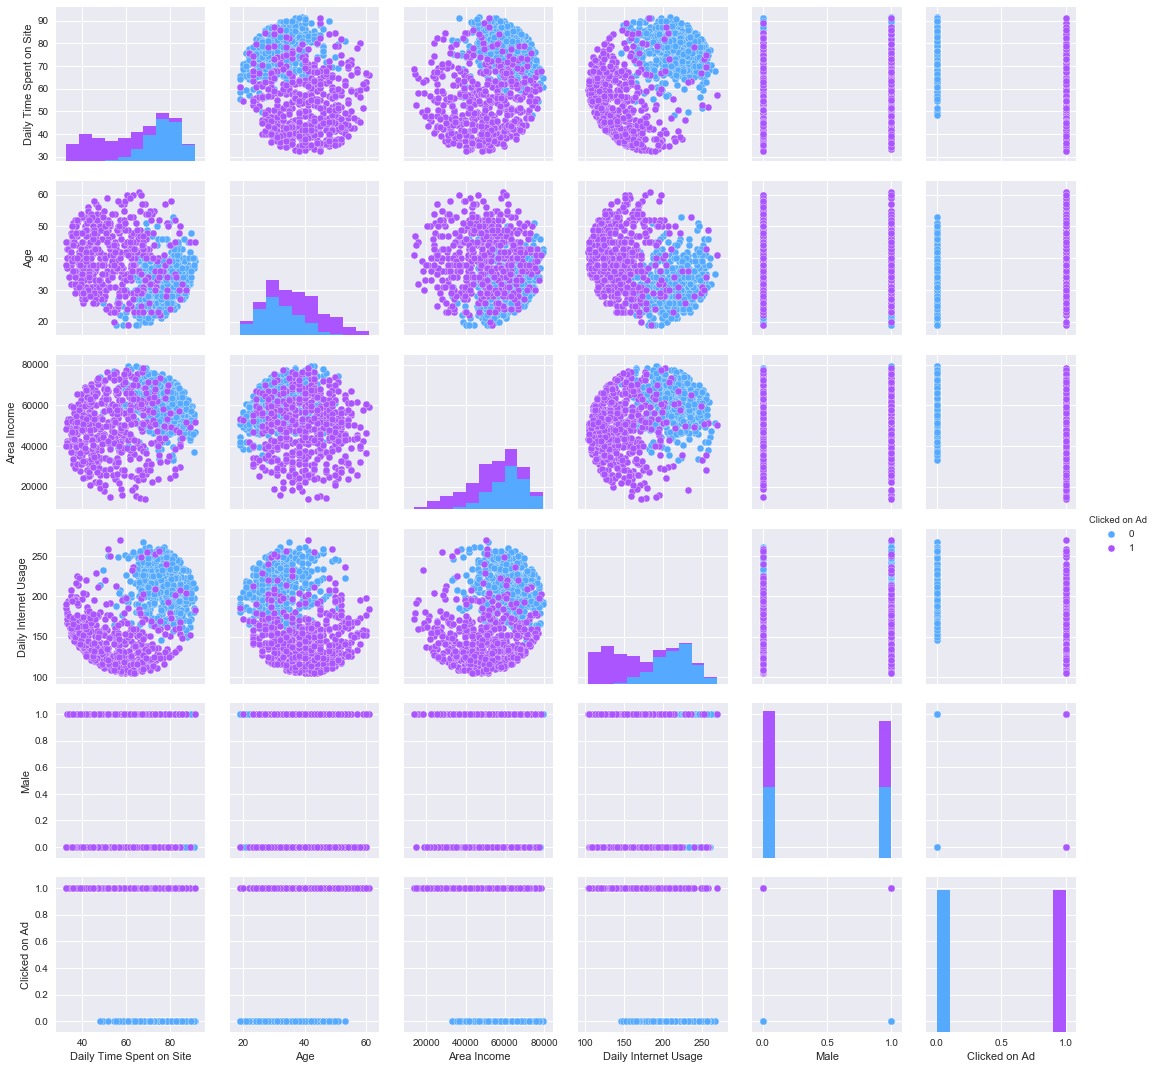

In [10]:
sns.pairplot(df,hue='Clicked on Ad',palette='cool')

In [11]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [12]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [13]:
df.drop(['Ad Topic Line', 'City','Country',
       'Timestamp'],inplace=True,axis=1)

In [15]:
df.head(1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.9,256.09,0,0


In [16]:
X=df.drop('Clicked on Ad',axis=1)

In [17]:
y=df['Clicked on Ad']

In [18]:
from sklearn.cross_validation import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=101)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log=LogisticRegression()

In [22]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
log.coef_

array([[-4.48304970e-02,  2.12881377e-01, -8.22688535e-06,
        -2.30559431e-02,  1.43580562e-03]])

In [24]:
predictions=log.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.94      0.92       171
          1       0.93      0.90      0.91       159

avg / total       0.92      0.92      0.92       330



In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,predictions)

array([[160,  11],
       [ 16, 143]], dtype=int64)

In [36]:
for i in log.coef_:
    l=i

In [37]:
l

array([-4.48304970e-02,  2.12881377e-01, -8.22688535e-06, -2.30559431e-02,
        1.43580562e-03])

In [38]:
coef=pd.DataFrame(l,X.columns,columns=['Coeff'])

In [39]:
coef

,Coeff
Daily Time Spent on Site,-0.044830
Age,0.212881
Area Income,-0.000008
Daily Internet Usage,-0.023056
Male,0.001436
